In [11]:
%load_ext autoreload
%autoreload 2

# file ops
from pathlib import Path
import warnings
warnings.filterwarnings(action="ignore", category=RuntimeWarning)

# spatial
import xarray as xa
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# general
from tqdm.auto import tqdm

# custom
from coralshift import functions_creche
from coralshift.utils import file_ops, config, utils
from coralshift.dataloading import get_data
from coralshift.plotting import spatial_plots, visualise_results
from coralshift.machine_learning import static_models, run_model, ml_results
from coralshift.processing import ml_processing
from coralshift.processing import spatial_data

import cmipper


# data fps
gt_data_dir = config.gt_data_dir
config_fp = "/maps/rt582/coralshift/runs/config_files/config_test.yaml"
config_info = file_ops.read_yaml(config_fp)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [ ]:
cmip_raster = ml_processing.ProcessMLData(config_info=config_info).get_merged_datasets()

In [17]:
(trains, tests, vals), ds_info = ml_processing.ProcessMLData(
    config_info=config_info
).generate_ml_ready_data()

	calculating statistics for static ML model(s)...


calculating statistics for variables: 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]


	applying spatial buffering...
440 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 440/440 [00:14<00:00, 31.06it/s]


	resampling dataset to 1 degree(s) resolution...



[WARNING] yaksa: 10 leaked handle pool objects


Loading UNEP xarray at 0.004 degrees resolution.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


	resampling dataset to 1 degree(s) resolution...



[WARNING] yaksa: 10 leaked handle pool objects


Loading gebco elevation xarray across [-32, 0] latitudes & [130, 170] longitudes from /maps-priv/maps/rt582/coralshift/data/bathymetry/gebco/gebco_2023_n0.0_s-40.0_w130.0_e170.0.nc.
	applying spatial buffering...
1 raster(s) to spatially buffer...


Buffering variables: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

	resampling dataset to 1 degree(s) resolution...




[WARNING] yaksa: 10 leaked handle pool objects


[-1001, 0]
	fitting scaler to X data...

	transforming data...


# Bathymetry/slope

In [ ]:
import cartopy.crs as ccrs
f, (ax_bath, ax_slopes) = plt.subplots(ncols=2, figsize=[12,7], subplot_kw={"projection": ccrs.PlateCarree()})

spatial_plots.plot_spatial(cmip_raster["elevation"], fax=(f,ax_bath), title=None, val_lims=[0,-500], cbar_dict={"orientation": "horizontal", "name": "depth", "cmap_type": "lim_blue"}, cartopy_dict={"alpha": 1, "facecolor": "lightgrey"})
spatial_plots.plot_spatial(cmip_raster["slope"], fax=(f,ax_slopes), title=None, cbar_dict={"orientation": "horizontal", "name": "gradient"}, cartopy_dict={"alpha": 1, "facecolor": "lightgrey"})

In [ ]:
sns.pairplot(cmip_raster[["slope", "elevation"]].to_dataframe(), kind="reg", diag_kind="kde", plot_kws={"color":"#3B9AB2", "scatter_kws": {"alpha": 0.01}}, diag_kws={"color":"#d83c04"})

In [ ]:
sns.pairplot(trains[0][["slope", "elevation"]], kind="reg", diag_kind="kde", plot_kws={"color":"#3B9AB2", "scatter_kws": {"alpha": 0.01}}, diag_kws={"color":"#d83c04"})

## Environmental

In [12]:
timeseries = get_data.ReturnRaster(config_info=config_info, ds_type="continuous").get_raw_raster(dataset="cmip")

In [6]:
# remove nans
vals = xa_da.values.flatten()
vals = vals[~np.isnan(vals)]
kde = stats.gaussian_kde(vals)

NameError: name 'xa_da' is not defined

In [7]:
monthly_data.values.flatten()

NameError: name 'monthly_data' is not defined

In [ ]:
calculate_pdf(monthly_data.values.flatten(), vins)

In [ ]:
bin_edges

In [ ]:
calculate_pdf(flat_monthly_data, bins=bin_edges)

Text(0.5, 1.0, 'Cumulative Monthly PDFs')

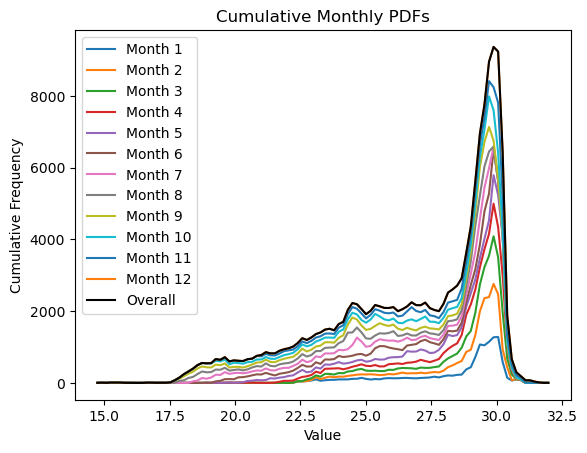

In [13]:
monthly_data = timeseries.groupby('time.month').mean(dim='time')["tos"]


# Define the bins using the overall data range
all_values = monthly_data.values.flatten()
all_values = all_values[~np.isnan(all_values)]
bin_edges = np.linspace(np.min(all_values), np.max(all_values), 101)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Function to calculate PDF with fixed bins
def calculate_pdf(array, bins):
    pdf, bins = np.histogram(array, bins=bins, density=False)
    return pdf, bins

# Prepare to plot PDFs
fig, ax = plt.subplots()

# Variable to store the cumulative PDF
cumulative_pdf = np.zeros_like(bin_centers)

stored = []
stored_cum = []

flat_monthly_data = monthly_data.values.flatten()
flat_monthly_data = flat_monthly_data[~np.isnan(flat_monthly_data)]


# Loop through each month and calculate the PDF
for month in range(1, 13):
    monthly_values = monthly_data.sel(month=month).values.flatten()
    monthly_values = monthly_values[~np.isnan(monthly_values)]
    pdf = calculate_pdf(monthly_values, bins=bin_edges)[0]
    
    cumulative_pdf += pdf
    
    stored.append(pdf)
    stored_cum.append(cumulative_pdf.copy())  # Copy to avoid reference issues
    ax.plot(bin_centers, cumulative_pdf, label=f'Month {month}')

ax.plot(bin_centers, calculate_pdf(flat_monthly_data, bins=bin_edges)[0], c="k", label='Overall')
# Add legend and labels
ax.legend()
ax.set_xlabel('Value')
ax.set_ylabel('Cumulative Frequency')
ax.set_title('Cumulative Monthly PDFs')

Text(0.5, 1.0, 'Cumulative Monthly PDFs')

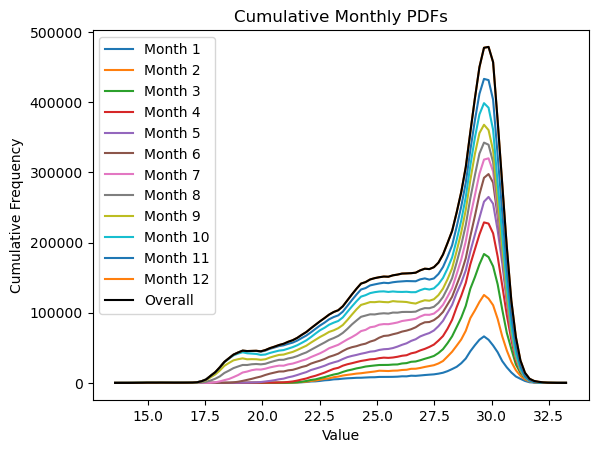

In [14]:
all_vals_spatial_av = timeseries["tos"]
monthly_data = all_vals_spatial_av.groupby('time.month')

# Define the bins using the overall data range
all_values = all_vals_spatial_av.values.flatten()
all_values = all_values[~np.isnan(all_values)]
bin_edges = np.linspace(np.min(all_values), np.max(all_values), 101)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Function to calculate PDF with fixed bins
def calculate_pdf(array, bins):
    pdf, bins = np.histogram(array, bins=bins, density=False)
    return pdf, bins

# Prepare to plot PDFs
fig, ax = plt.subplots()

# Variable to store the cumulative PDF
cumulative_pdf = np.zeros_like(bin_centers)

stored = []
stored_cum = []

flat_monthly_data = all_vals_spatial_av.values.flatten()
flat_monthly_data = flat_monthly_data[~np.isnan(flat_monthly_data)]


# Loop through each month and calculate the PDF
for month in range(1, 13):
    monthly_values = monthly_data[month].values.flatten()
    monthly_values = monthly_values[~np.isnan(monthly_values)]
    pdf = calculate_pdf(monthly_values, bins=bin_edges)[0]
    
    cumulative_pdf += pdf
    
    stored.append(pdf)
    stored_cum.append(cumulative_pdf.copy())  # Copy to avoid reference issues
    ax.plot(bin_centers, cumulative_pdf, label=f'Month {month}')

ax.plot(bin_centers, calculate_pdf(flat_monthly_data, bins=bin_edges)[0], c="k", label='Overall')
# Add legend and labels
ax.legend()
ax.set_xlabel('Value')
ax.set_ylabel('Cumulative Frequency')
ax.set_title('Cumulative Monthly PDFs')

In [ ]:
sns.kdeplot(flat_monthly_data, color="k", label="kde")

In [ ]:
stored_cum[3]

In [ ]:
stored_cum[0] < stored_cum[3]

In [ ]:
all_vals_spatial_av.groupby('time.month')[1]

NameError: name 'all_vals_temporal_av' is not defined

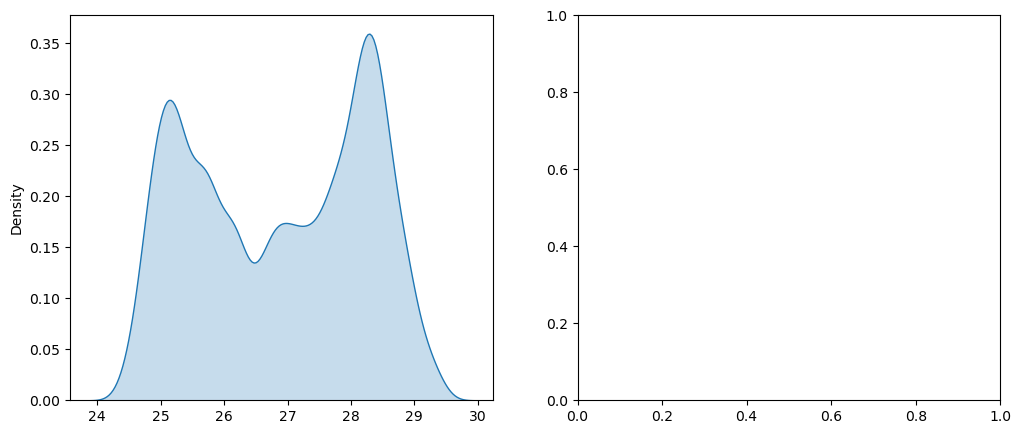

In [15]:
all_vals_spatial_av = timeseries.mean(dim=["latitude", "longitude"])["tos"]
all_vals_monthly_av = timeseries.groupby('time.month').mean(dim='time')["tos"]

fig, axes = plt.subplots(ncols=2, figsize=[12,5])
sns.kdeplot(all_vals_spatial_av, bw_adjust=0.5, fill=True, common_norm=False, ax=axes[0])
sns.kdeplot(all_vals_temporal_av, bw_adjust=0.5, fill=True, common_norm=False, ax=axes[1], legend=False)

In [ ]:
sns.kdeplot(monthly_values, bw_adjust=0.5, fill=True, common_norm=True)

range(0, 12)
range(0, 12)
range(0, 12)


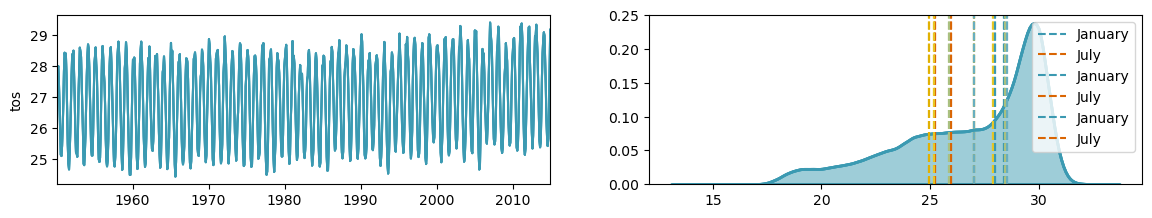

In [16]:
import calendar

def plot_month_marked_hist(ax, xa_d):
    sns.kdeplot(xa_d.values.flatten(), ax=ax, color="#3B9AB2", lw=2, fill=True, alpha=0.2)
    
    ax.set(xlabel=None, ylabel=None)
    
    # Set scientific notation for y-axis labels if values are below 0.01
    if xa_d.mean(dim=["latitude", "longitude"]).values.min() < 0.01:
        ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)

    # Plot vertical lines on histogram corresponding to means for each month
    monthly_xa_d = xa_d.groupby("time.month").mean(dim="time").mean(dim=["latitude", "longitude"])
    month_names = [calendar.month_name[i] for i in monthly_xa_d["month"].values]
    
    cmap = spatial_plots.ColourMapGenerator().get_cmap("cyc")
    colours = [cmap(value) for value in np.linspace(0, 1, len(monthly_xa_d.month))]
    print(range(len(monthly_xa_d.month)))
    for month_i in range(len(monthly_xa_d.month)):
        month_mean_val = monthly_xa_d.isel(month=month_i).values
        
        if month_i % len(monthly_xa_d.month) == 6 or month_i % len(monthly_xa_d.month) == 0:
            ax.axvline(month_mean_val, color=colours[month_i], linestyle="--", alpha=1, label=month_names[month_i])
        else:
            ax.axvline(month_mean_val, color=colours[month_i], linestyle="--", alpha=1)
    
    ax.legend(loc="upper right")


def plot_timeseries_hist(ax, xa_d):
    # Plot timeseries average over longitude, latitude
    xa_d.mean(dim=["latitude", "longitude"]).plot(ax=ax[0], color="#3B9AB2")
    ax[0].set(xlabel=None)
    ax[0].set_xlim([xa_d.time.values[0], xa_d.time.values[-1]])
    
    if xa_d.mean(dim=["latitude", "longitude"]).values.min() < 0.01:
        ax[0].ticklabel_format(axis="y", style="sci", scilimits=(-4,4), useMathText=True)

    plot_month_marked_hist(ax[1], xa_d)
    # Plot normal distribution of timeseries values using seaborn
    # sns.kdeplot(xa_d.mean(dim=["latitude", "longitude"]).values.flatten(), ax=ax[1], color="#3B9AB2", lw=2, fill=True, alpha=0.2)
    # sns.kdeplot(xa_d.mean(dim=["latitude", "longitude"]).values.flatten(), ax=ax[1], color="#3B9AB2", lw=2, fill=True, alpha=0.2)
 

def plot_timeseries_hists(timeseries_xa_d):

    if isinstance(timeseries_xa_d, xa.Dataset):
        variable_names = timeseries_xa_d.data_vars
        num_variables = len(variable_names)
    else:
        variable_names = timeseries_xa_d.name
        num_variables = 1
    
    f, axes = plt.subplots(nrows=num_variables, ncols=2, figsize=[14, 2.2*num_variables])
    for ax_i, var in enumerate(variable_names):
        if not isinstance(timeseries_xa_d, xa.DataArray):
            xa_d = timeseries_xa_d[var]
        else:
            xa_d = timeseries_xa_d
            plot_timeseries_hist(axes, xa_d)
            continue

        # plot_timeseries_hist(axes[i], xa_d)
            
        
        # # Plot vertical lines on histogram corresponding to means for each month
        # monthly_xa_d = xa_d.groupby("time.month").mean(dim="time").mean(dim=["latitude", "longitude"])
        # month_names = [calendar.month_name[i] for i in monthly_xa_d["month"].values]
        
        # cmap = spatial_plots.ColourMapGenerator().get_cmap("cyc")
        # colours = [cmap(value) for value in np.linspace(0, 1, len(monthly_xa_d.month))]
        
        # for month_i in range(len(monthly_xa_d.month)):
        #     month_mean_val = monthly_xa_d.isel(month=month_i).values
            
        #     if month_i % len(monthly_xa_d.month) == 6 or month_i % len(monthly_xa_d.month) == 0:
        #         axes[ax_i, 1].axvline(month_mean_val, color=colours[month_i], linestyle="--", alpha=1, label=month_names[month_i])
        #     else:
        #         axes[ax_i, 1].axvline(month_mean_val, color=colours[month_i], linestyle="--", alpha=1)
        
        # axes[ax_i, 1].legend(loc="upper right")

plot_timeseries_hists(timeseries["tos"])

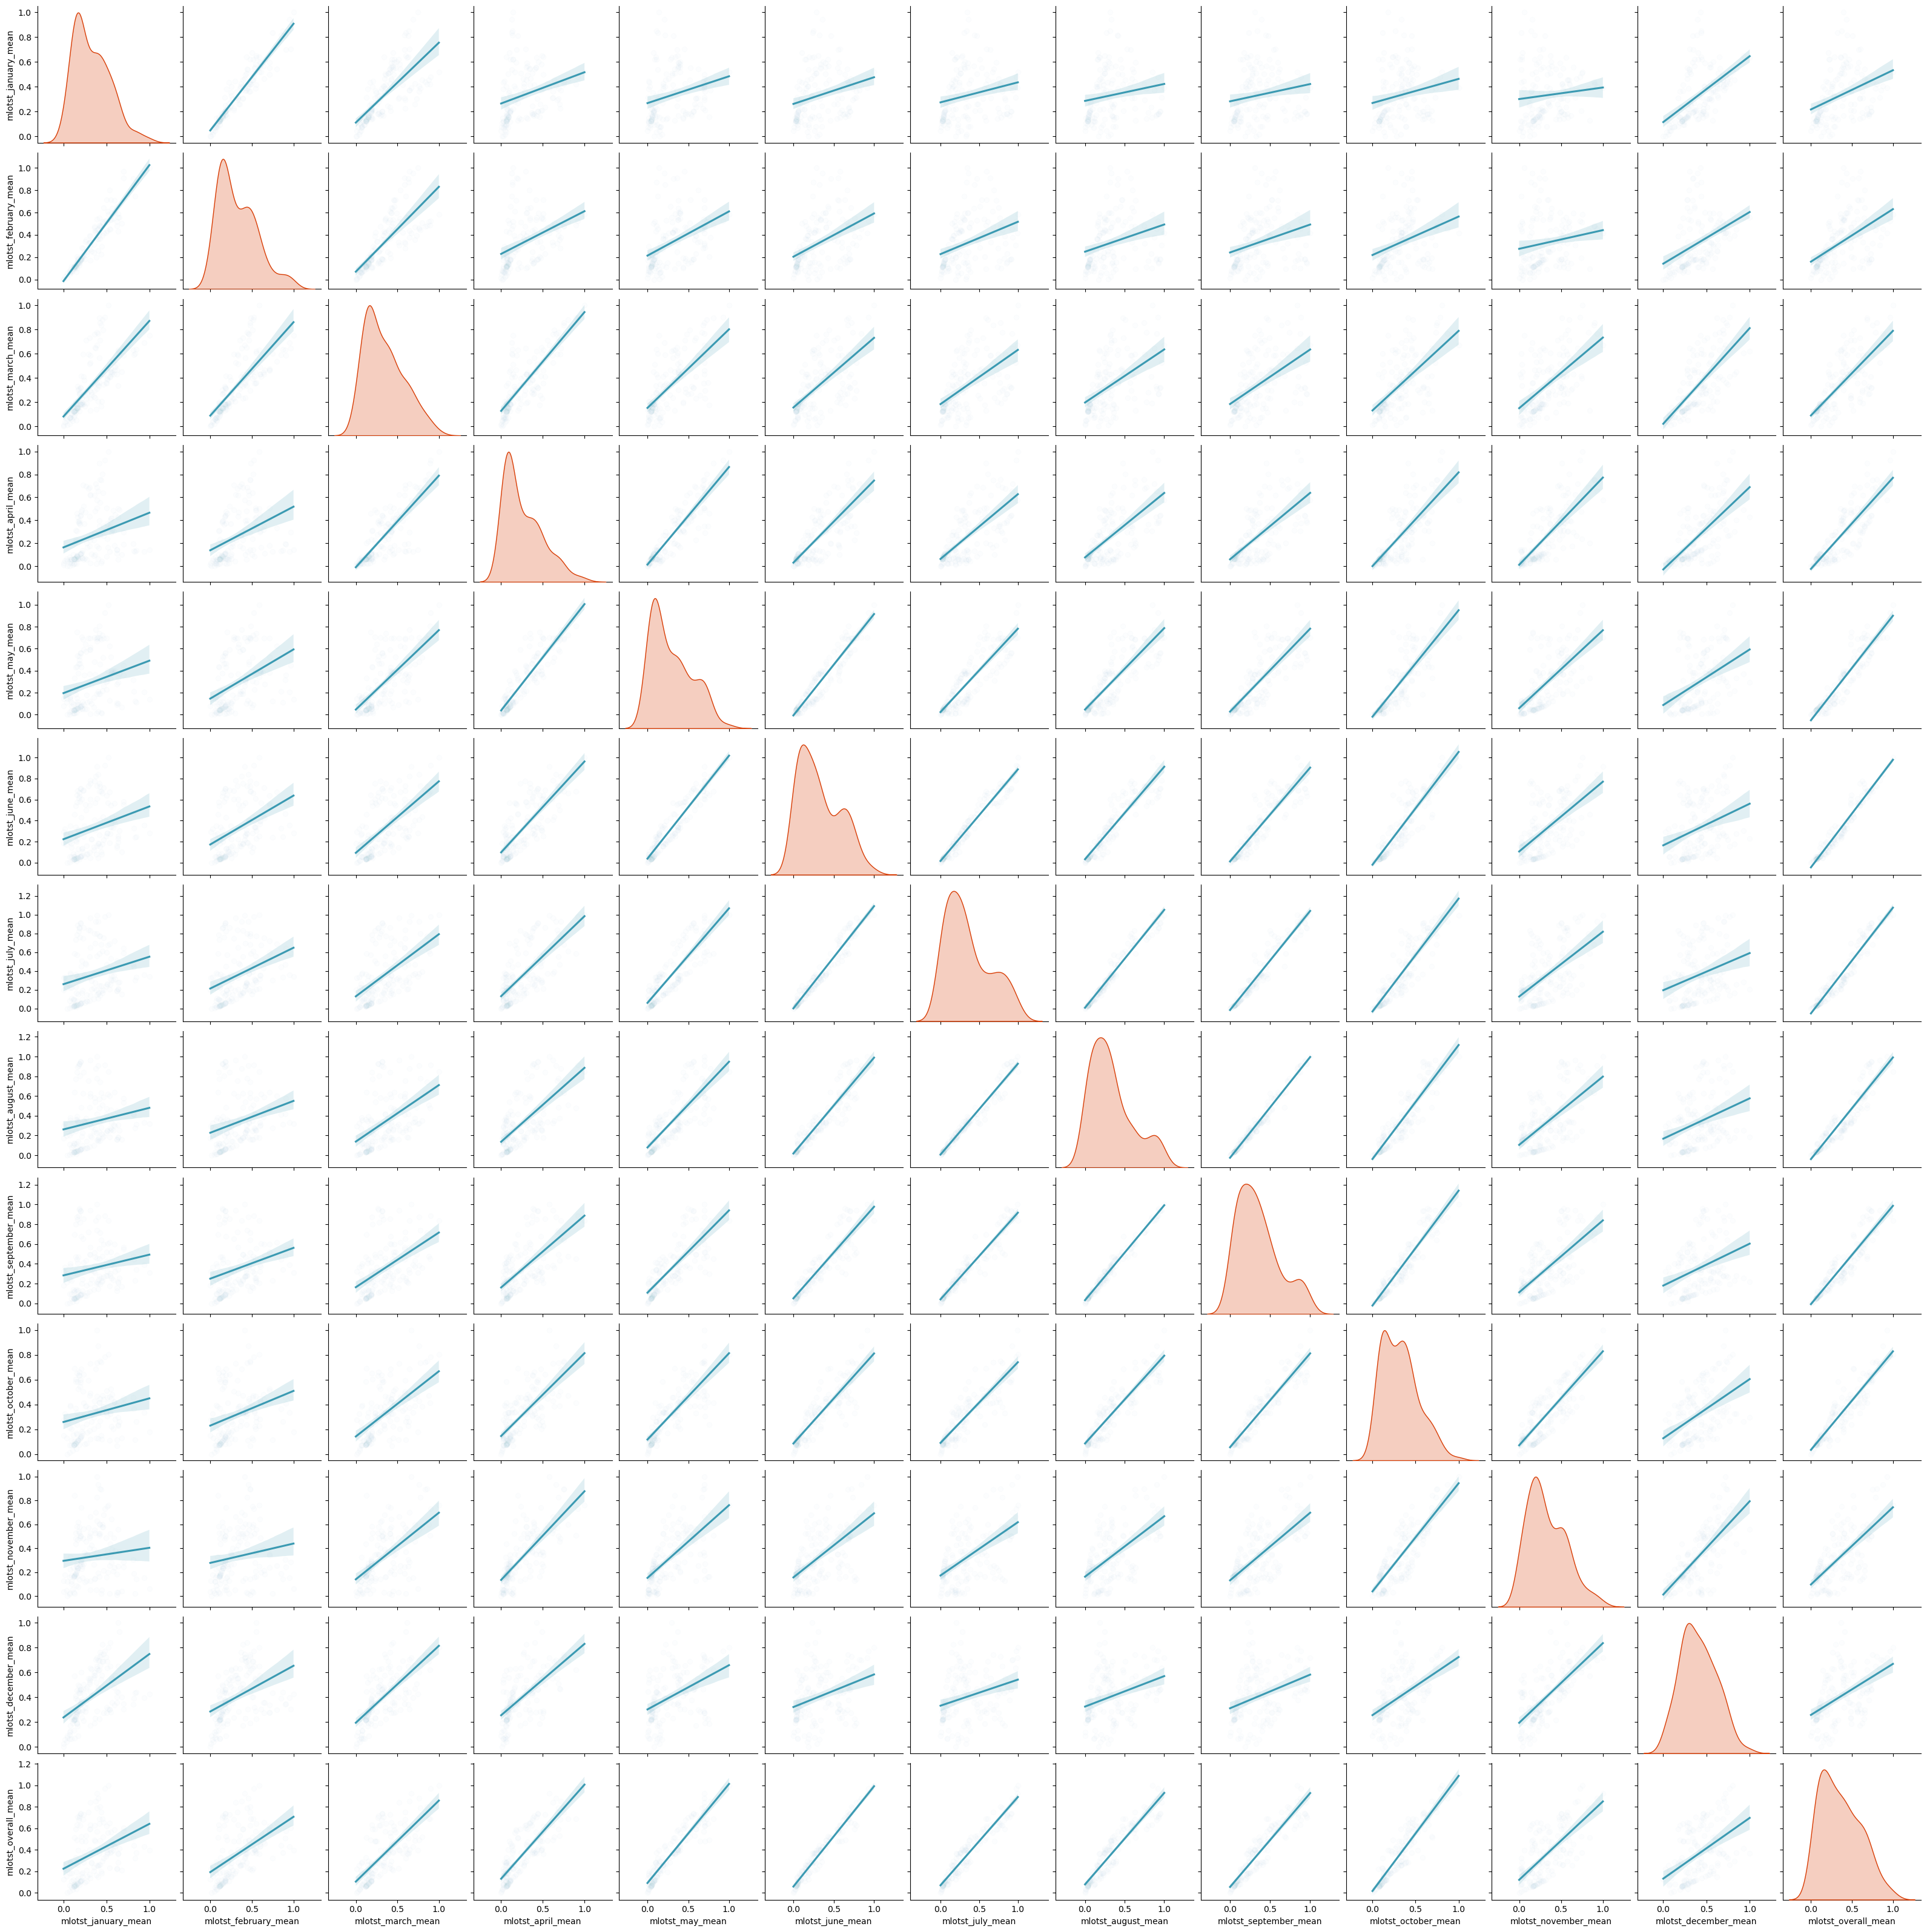

In [18]:
sns.pairplot(trains[0].filter(regex="^mlotst.*mean$")[::-1], kind="reg", diag_kind="kde", plot_kws={"color":"#3B9AB2", "scatter_kws": {"alpha": 0.01}}, diag_kws={"color":"#d83c04"})

In [19]:
trains[0].filter(regex=".*_january_mean$")

mlotst_january_mean  rsdo_january_mean  so_january_mean  \
latitude longitude                                                            
-8.5     132.5                 0.519250           0.013148         0.587966   
         150.5                 0.045310           0.047720         0.773394   
-6.5     137.5                 0.250031           0.583605         0.187778   
-18.5    147.5                 0.258804           0.198492         0.792861   
-22.5    153.5                 0.478842           0.085545         0.786784   
...                                 ...                ...              ...   
-9.5     132.5                 0.416109           0.013810         0.652135   
-22.5    167.5                 0.164765           0.086171         0.842517   
-10.5    135.5                 0.553061           0.076832         0.719043   
-2.5     150.5                 0.214854           0.017817         0.757001   
-10.5    150.5                 0.171547           0.278353         0.742240   

                    thetao_january_mean  tos_january_mean  uo_january_mean  \
latitude longitude                                                           
-8.5     132.5                 0.494967          0.636233         0.627366   
         150.5                 0.381744          0.783434         0.015566   
-6.5     137.5                 0.868228          0.786983         0.581752   
-18.5    147.5                 0.412077          0.537260         0.706557   
-22.5    153.5                 0.327044          0.350322         0.598088   
...                                 ...               ...              ...   
-9.5     132.5                 0.512761          0.665945         0.304027   
-22.5    167.5                 0.000000          0.111279         0.783798   
-10.5    135.5                 0.783357          0.730408         0.450158   
-2.5     150.5                 0.726408          0.814976         0.189648   
-10.5    150.5                 0.521318          0.707822         0.692238   

                    vo_january_mean  hfds_january_mean  vmo_january_mean  \
latitude longitude                                                         
-8.5     132.5             0.630317           0.306210          0.589793   
         150.5             0.759203           0.838768          0.733210   
-6.5     137.5             0.679463           0.111861          0.665352   
-18.5    147.5             0.658971           0.695428          0.622401   
-22.5    153.5             0.390962           0.422587          0.346125   
...                             ...                ...               ...   
-9.5     132.5             0.664309           0.331818          0.627580   
-22.5    167.5             0.755231           0.920948          0.723158   
-10.5    135.5             0.691834           0.215674          0.659035   
-2.5     150.5             0.690552           0.500504          0.656671   
-10.5    150.5             0.722164           0.786183          0.691925   

                    umo_january_mean  wfo_january_mean  
latitude longitude                                      
-8.5     132.5              0.641415          0.547835  
         150.5              0.008965          0.420431  
-6.5     137.5              0.597662          0.171050  
-18.5    147.5              0.718082          0.748946  
-22.5    153.5              0.613771          0.996453  
...                              ...               ...  
-9.5     132.5              0.318216          0.492402  
-22.5    167.5              0.782101          0.951225  
-10.5    135.5              0.502918          0.411465  
-2.5     150.5              0.213899          0.480594  
-10.5    150.5              0.688203          0.638202  

[148 rows x 11 columns]

In [ ]:
sns.pairplot(trains[0].filter(regex=".*_january_mean$")[::-1], kind="reg", diag_kind="kde", plot_kws={"color":"#3B9AB2", "scatter_kws": {"alpha": 0.01}}, diag_kws={"color":"#d83c04"})

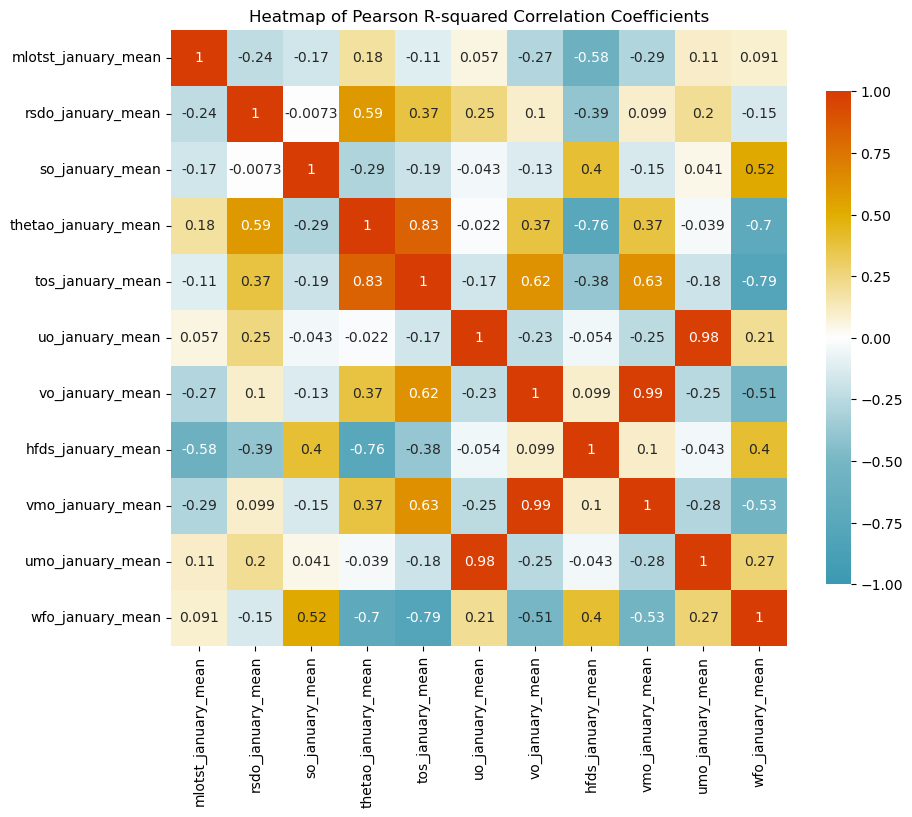

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate Pearson correlation matrix
correlation_matrix = trains[0].filter(regex=".*_january_mean$").corr() 

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=spatial_plots.ColourMapGenerator().get_cmap("div", vmin=-1, vmax=1)[0], square=True, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Pearson R-squared Correlation Coefficients')
plt.show()




## Ground truth

In [ ]:
unep_raster = get_data.ReturnRaster(config_info=config_info).get_raw_raster(dataset="unep").sel(latitude=slice(-15,-10), longitude=slice(142.5, 145))
unep_raster_resampled = get_data.ReturnRaster(resolution=0.01, config_info=config_info).get_resampled_raster(unep_raster)

In [ ]:
# normalise datarray
norm_unep = unep_raster_resampled["UNEP_GDCR"] / unep_raster_resampled["UNEP_GDCR"].max()

spatial_plots.plot_spatial(norm_unep.sel(latitude=slice(-15,-10), longitude=slice(142.5, 145)), cartopy_dict={"alpha":1, "facecolor": "lightgrey"}, labels=None)

In [ ]:
space_lim_norm_unep = norm_unep.sel(latitude=slice(-15,-10), longitude=slice(142.5, 145))

import cartopy.crs as ccrs
num_plots = 5
fig, axes = plt.subplots(dpi=300, nrows=1, ncols=num_plots, figsize=[20, 8*num_plots], subplot_kw={"projection": ccrs.PlateCarree()})
thresholds = np.linspace(0.1, 0.5, num_plots)
for threshold_i, threshold in enumerate(thresholds):
    spatial_plots.plot_spatial(space_lim_norm_unep.where(space_lim_norm_unep > threshold), fax=(fig, axes[threshold_i]), title=f"Threshold: {round(threshold,1)}", cbar_dict={"cbar": None}, val_lims=[0,1], labels=None, cartopy_dict={"facecolor": "lightgrey", "alpha": 1})

# tight layout
plt.tight_layout()

In [ ]:
# quantitative threshold effect
from tqdm.auto import tqdm

num_thresholds = 100
thresholds = np.linspace(0, 1, num_thresholds)
resolutions = [0.1, 0.25, 0.5, 0.75, 1]
sum_vals = np.zeros((num_thresholds, len(resolutions)))

unep_raster = get_data.ReturnRaster(lats=[-90,90], lons=[-180,180], config_info=config_info).get_raw_raster(dataset="unep")
# unep_raster = get_data.ReturnRaster(config_info=config_info).get_raw_raster(dataset="unep")

for resolution_i, resolution in enumerate(resolutions):
    unep_da = get_data.ReturnRaster(lats=[-90,90], lons=[-180,180], resolution=resolution, config_info=config_info).get_resampled_raster(unep_raster)
    # norm_unep_da = unep_da["UNEP_GDCR"] / unep_da["UNEP_GDCR"].max()
    norm_unep_da = unep_da["unep_coral_presence"] / unep_da["unep_coral_presence"].max()
    for threshold_i, threshold in tqdm(enumerate(thresholds), total=len(thresholds), desc="Calculating thresholded values"):
        sum_vals[threshold_i][resolution_i] = norm_unep_da.where(norm_unep_da > threshold).sum()


In [ ]:


cmap = spatial_plots.ColourMapGenerator().get_cmap("seq")
colours = [cmap(value) for value in np.linspace(0,1,len(resolutions))]
f = plt.figure(figsize=[10,5])

thresholds = np.linspace(0, 1, num_thresholds)

for resolution_i, resolution in enumerate(resolutions):
    plt.plot(thresholds, sum_vals[:, resolution_i], color=colours[resolution_i], label=f"Resolution: {resolution}º")

thresholds = np.linspace(0.1, 0.5, 5)

for threshold in thresholds:
    plt.vlines(threshold, 0, np.max(sum_vals), color="black", linestyle="--", alpha=0.5)

plt.xlabel("Presence-absence threshold")
plt.ylabel("Sum of values exceeding threshold")
plt.legend()
plt.ylim([0, np.max(sum_vals)])
plt.xlim([0, 1])
plt.xticks(np.linspace(0, 1, 11));

In [ ]:
from shapely.geometry import Polygon

global_unep_raster = get_data.ReturnRaster(lats=[-90,90],lons=[-180,180], config_info=config_info).get_raw_raster(dataset="unep")
resampled_global_unep_raster = get_data.ReturnRaster(lats=[-90,90],lons=[-180,180], resolution=1, config_info=config_info).get_resampled_raster(global_unep_raster)

f, ax, im = spatial_plots.plot_spatial(resampled_global_unep_raster["unep_coral_presence"], extent="global", title=None, labels=None, cbar_dict={"cbar": False})

# plot rectangle over area
lats = config_info["lats"]
lons = config_info["lons"]

rectangle = Polygon([(min(lons), min(lats)), (min(lons), max(lats)), (max(lons), max(lats)), (max(lons), min(lats))])

ax.add_geometries([rectangle], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='red', zorder=10)

In [ ]:
unep_raster_resampled_001 = get_data.ReturnRaster(resolution=0.1, config_info=config_info).get_resampled_raster(unep_raster)
spatial_plots.plot_spatial(unep_raster_resampled_001["unep_coral_presence"], title=None, labels=["h"], cbar_dict={"cbar": False})

In [ ]:
from shapely.geometry import Polygon

fig, axes = plt.subplots(ncols=2, figsize=[24,12], subplot_kw={"projection": ccrs.Robinson()})

spatial_plots.plot_spatial(resampled_global_unep_raster["unep_coral_presence"], fax=(fig, axes[0]), extent="global", title=None, labels=None, cbar_dict={"cbar": False})

# plot rectangle over area
lats = sorted(config_info["lats"])
lons = sorted(config_info["lons"])
rectangle = Polygon([(min(lons), min(lats)), (min(lons), max(lats)), (max(lons), max(lats)), (max(lons), min(lats))])

spatial_plots.plot_spatial(unep_raster_resampled_001["unep_coral_presence"].sel(latitude=slice(lats[0], lats[1]), longitude=slice(lons[0], lons[1])), fax=(fig, axes[1]), map_proj=ccrs.Robinson(), title=None, labels=["d"], cbar_dict={"cbar": False})
aspect_ratio = axes[0].get_aspect()
axes[1].set_aspect(aspect=aspect_ratio/1.5)

axes[0].add_geometries([rectangle], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='red', zorder=10)
axes[1].add_geometries([rectangle], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='red', zorder=10, lw=4)

# Resampling

In [ ]:
# get data
resolutions = [1, 
# 0.5, 
# 0.25, 0.1, 0.05, 0.01
]
depth_lims = [(-2000, 0), (-1500, 0),
(-1000, 0), (-500, 0), (-200, 0), (-100, 0), (-80, 0), (-60, 0), (-40, 0), (-20, 0)
]

vals = []
unep_val_sample = []
gebco_val_sample = []
num_points = 10000

lats = config_info["lats"]
lons = config_info["lons"]
# unep_fp = Path(config.gdcr_dir) / "01_Data/WCMC008_CoralReef2021_Py_v4_1.shp"
# unep_gdf = gpd.read_file(unep_fp)
gebco_xa = get_data.ReturnRaster(config_info=config_info).get_raw_raster(dataset="gebco")

for resolution in tqdm(resolutions, desc=f"iterating over {len(resolutions)} resolution(s)..."):
    # generate gt raster at correct resolution
    unep_raster = get_data.rasterize_geodf(
        unep_gdf, resolution=resolution,
    )
    # generate gt xarray at correct resolution
    unep_xa = spatial_data.process_xa_d(get_data.raster_to_xarray(
        unep_raster,
        x_y_limits=utils.lat_lon_vals_from_geo_df(unep_gdf)[:4],
        resolution=resolution,
        name="unep_coral_presence",
    )).sel(latitude=slice(min(lats), max(lats)), longitude=slice(min(lons), max(lons)))

    # ensure unep array normalised
    unep_xa = unep_xa / unep_xa.max()

    # scale gebco bathymetry to correct resolution
    gebco_xa_resampled = get_data.resample_to_other(gebco_xa, unep_xa).compute()
    
    if len(unep_xa.values.flatten()) < num_points:
        unep_val_sample.append(unep_xa.values.flatten())
        gebco_val_sample.append(gebco_xa_resampled["elevation"].values.flatten())
    else:
        unep_val_sample.append(unep_xa.values.flatten()[::int(len(unep_xa.values.flatten())/num_points)])
        gebco_val_sample.append(gebco_xa_resampled["elevation"].values.flatten()[::int(len(unep_xa.values.flatten())/num_points)])

    # get ratios of coral presence to bathymetry
    # TODO: getting a ratio greater than 1: fix
    vals.append(functions_creche.investigate_depth_mask(
        comp_var_xa=unep_xa, mask_var_xa=gebco_xa_resampled, var_limits=depth_lims))
    

In [ ]:
functions_creche.investigate_depth_mask(
        comp_var_xa=unep_xa, mask_var_xa=gebco_xa_resampled, var_limits=depth_lims)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=300)  # Creating side-by-side subplots

colours = spatial_plots.get_n_colors_from_hexes(len(resolutions))
x_labels = [str(depth_lim) for depth_lim in depth_lims]

# plotting
for j, resolution in enumerate(resolutions[::-1]):
    val_sums = vals[j][0]
    val_ratios = vals[j][1]
    ax1.scatter(x_labels, val_sums, label=f"resolution: {resolution}", c=colours[j], marker="o")
    ax2.scatter(x_labels, val_ratios, label=f"resolution: {resolution}", c=colours[j], marker="x")

# formatting
# spatial_plots.customize_plot_colors(fig, ax1)
# spatial_plots.customize_plot_colors(fig, ax2)

ax1.set_ylabel("Total coral presence")
ax2.set_ylabel("Coral presence-absence ratio")
ax1.set_xlabel("Depth mask limits (m)")
ax2.set_xlabel("Depth mask limits (m)")
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Create legends for markers (resolutions)
legend_lines_1 = [
    Line2D([0], [0], color=colours[j], marker="o", linestyle='None', label=f"resolution: {resolutions[j]}")
    for j in range(len(resolutions))
]
ax1.legend(handles=legend_lines_1, loc='upper left', title="# grid cells containing coral")
ax1.set_yscale("log")
ax1.grid()

legend_lines_2 = [
    Line2D([0], [0], color=colours[j], marker="x", linestyle='None', label=f"resolution: {resolutions[j]}")
    for j in range(len(resolutions))
]
ax2.legend(handles=legend_lines_2, loc='upper right', title="coral presence-absence ratio")
ax2.axhline(0.5, c="b", ls="--")
plt.show()


In [ ]:
np.shape(vals)

In [ ]:
np.max(val_ratios)

In [ ]:
data

In [ ]:
N = len(resolutions)

data = {"resolution": [], "depth": [], "value": []}

for i in range(N):
    data["resolution"].extend([str(resolutions[i])] * len(gebco_val_sample[i]))
    data["depth"].extend(gebco_val_sample[i])
    data["value"].extend(unep_val_sample[i])
    
df_cat = pd.DataFrame(data)

# Separate the data based on 'value' for plotting
df_value_0 = df_cat[df_cat['value'] == 0]
df_value_1 = df_cat[df_cat['value'] != 0]

# Create an array with the colors you want to use
presence_palette = sns.color_palette(["#d83c04"])
absence_palette = sns.color_palette(["#3B9AB2"])

# Set your custom color palette
sns.set_palette(absence_palette)
fig, ax = plt.subplots(dpi=300)
# Create a scatter plot with Seaborn's stripplot for value '0' first
sns.stripplot(ax=ax, data=df_value_0, x="depth", y="resolution", hue="value", palette=absence_palette, legend=False, s=3, alpha=0.1)

sns.set_palette(presence_palette)

# Then plot value '1' on top with higher opacity
sns.stripplot(data=df_value_1, x="depth", y="resolution", hue="value", palette=presence_palette, legend=False, s=3, alpha=0.5, ax=ax)

        
plt.ylabel("Resolution (degrees)")
plt.xlabel("Depth")

# customize_plot_colors(fig, ax)

# Manipulate x-axis ticks and labels to show only every 100th value
new_ticks = ax.get_xticks()[::1]
ax.set_xticks(new_ticks)
ax.set_xticklabels([f'{int(val)}' for val in new_ticks])

plt.xlim([-6000, 2000])

# Create a legend with matching colors
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=["#3B9AB2", "#d83c04"][i], markersize=10, label=str(val)) for i, val in enumerate(["absence", "presence"])]
plt.legend(handles=legend_handles, title="Value", loc="lower left");
